<a href="https://colab.research.google.com/github/MnthnShrmaa/Heart-Disease-Diagnostics/blob/main/Heart_Disease_Diagnostics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/Heart Disease data.csv")

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
gen_mapping = {0: 'female', 1: 'male'}
data['sex'] = data['sex'].map(gen_mapping)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,male,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,male,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,male,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,male,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,female,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,male,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,male,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,male,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,female,0,110,254,0,0,159,0,0.0,2,0,2,1


Overall Heart Disease Rate Calculation

In [ ]:
ohdr = data['target'].mean()
ohdr

0.5131707317073171

Calculation of heart disease rates for each gender

In [ ]:
data.groupby('sex')['target'].mean()

sex
female    0.724359
male      0.420757
Name: target, dtype: float64

Creating a new column "agegrp" in the dataset

In [ ]:
bins = [0,30,40,50,60,70,80]
labels = ['0-29', '30-39','40-49','50-59','60-69','70-79', ]
data['agegrp']= pd.cut(data['age'],bins = bins,labels = labels, right = False)
print(data[['age','agegrp']].head())

   age agegrp
0   52  50-59
1   53  50-59
2   70  70-79
3   61  60-69
4   62  60-69


In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,agegrp
0,52,male,0,125,212,0,1,168,0,1.0,2,2,3,0,50-59
1,53,male,0,140,203,1,0,155,1,3.1,0,0,3,0,50-59
2,70,male,0,145,174,0,1,125,1,2.6,0,0,3,0,70-79
3,61,male,0,148,203,0,1,161,0,0.0,2,1,3,0,60-69
4,62,female,0,138,294,1,1,106,0,1.9,1,3,2,0,60-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,male,1,140,221,0,1,164,1,0.0,2,0,2,1,50-59
1021,60,male,0,125,258,0,0,141,1,2.8,1,1,3,0,60-69
1022,47,male,0,110,275,0,0,118,1,1.0,1,1,2,0,40-49
1023,50,female,0,110,254,0,0,159,0,0.0,2,0,2,1,50-59


In [ ]:
data['agegrp'].value_counts()

agegrp
50-59    422
60-69    275
40-49    237
30-39     53
70-79     34
0-29       4
Name: count, dtype: int64

In [ ]:
df = pd.DataFrame(data)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,agegrp
0,52,male,0,125,212,0,1,168,0,1.0,2,2,3,0,50-59
1,53,male,0,140,203,1,0,155,1,3.1,0,0,3,0,50-59
2,70,male,0,145,174,0,1,125,1,2.6,0,0,3,0,70-79
3,61,male,0,148,203,0,1,161,0,0.0,2,1,3,0,60-69
4,62,female,0,138,294,1,1,106,0,1.9,1,3,2,0,60-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,male,1,140,221,0,1,164,1,0.0,2,0,2,1,50-59
1021,60,male,0,125,258,0,0,141,1,2.8,1,1,3,0,60-69
1022,47,male,0,110,275,0,0,118,1,1.0,1,1,2,0,40-49
1023,50,female,0,110,254,0,0,159,0,0.0,2,0,2,1,50-59


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
agegrp      0
dtype: int64

In [ ]:
df.shape

(1025, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1025 non-null   int64   
 1   sex       1025 non-null   object  
 2   cp        1025 non-null   int64   
 3   trestbps  1025 non-null   int64   
 4   chol      1025 non-null   int64   
 5   fbs       1025 non-null   int64   
 6   restecg   1025 non-null   int64   
 7   thalach   1025 non-null   int64   
 8   exang     1025 non-null   int64   
 9   oldpeak   1025 non-null   float64 
 10  slope     1025 non-null   int64   
 11  ca        1025 non-null   int64   
 12  thal      1025 non-null   int64   
 13  target    1025 non-null   int64   
 14  agegrp    1025 non-null   category
dtypes: category(1), float64(1), int64(12), object(1)
memory usage: 113.5+ KB


In [ ]:
data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

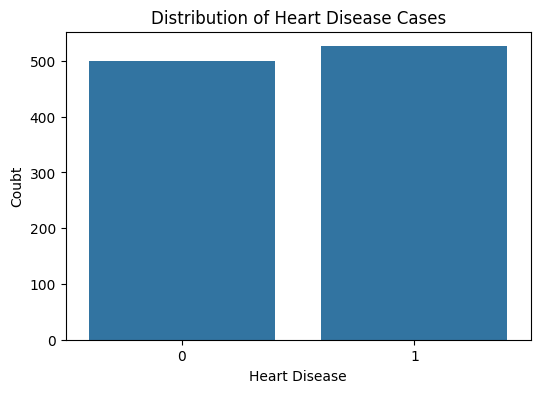

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='target',data=data)
plt.title("Distribution of Heart Disease Cases")
plt.xlabel("Heart Disease")
plt.ylabel("Coubt")
plt.show()

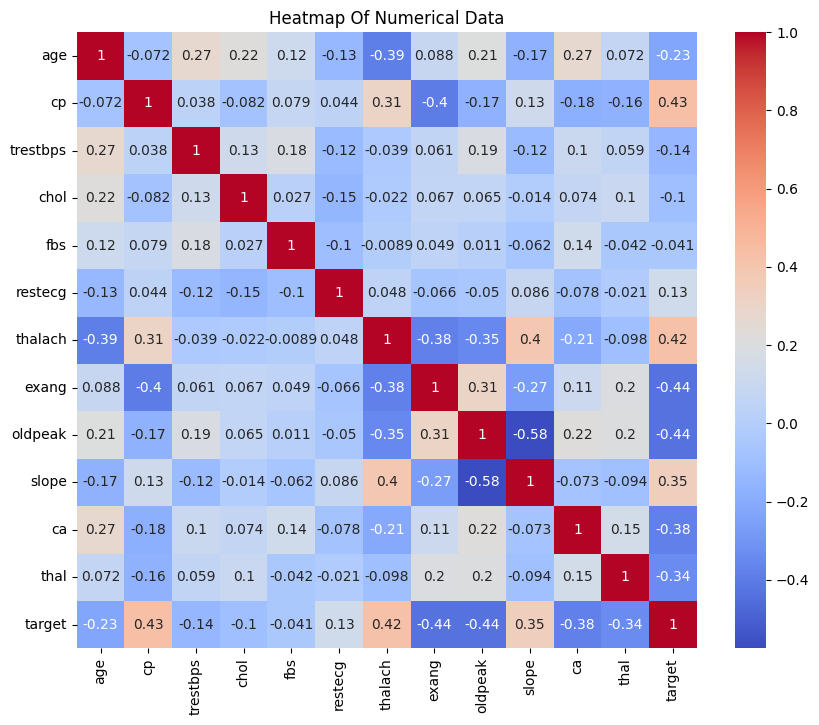

In [ ]:
num_col = data.select_dtypes(include = ['number'])
plt.figure(figsize=(10,8))
sns.heatmap(num_col.corr(),annot =True, cmap ="coolwarm")
plt.title("Heatmap Of Numerical Data")
plt.show()

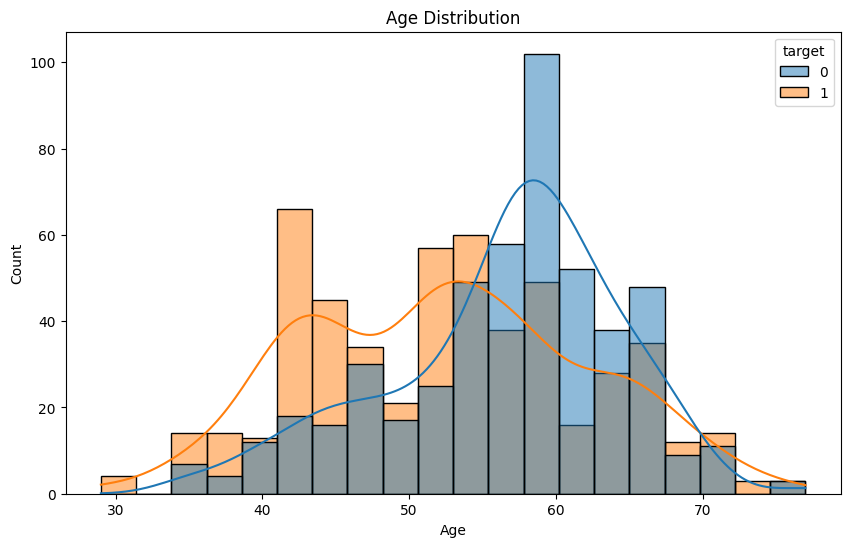

In [ ]:
plt.figure(figsize =(10,6))
sns.histplot(data= data, x='age', hue='target',kde = True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

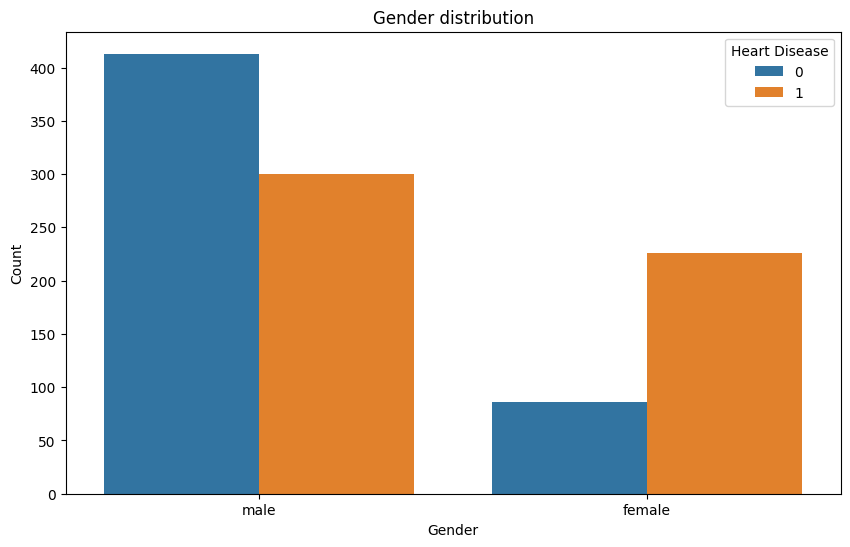

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(data=data, x='sex', hue = 'target')
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

<ipython-input-20-2b47dc50cf21>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x= 'target', palette ='RdBu_r')


Text(0.5, 1.0, 'Count of the diseased')

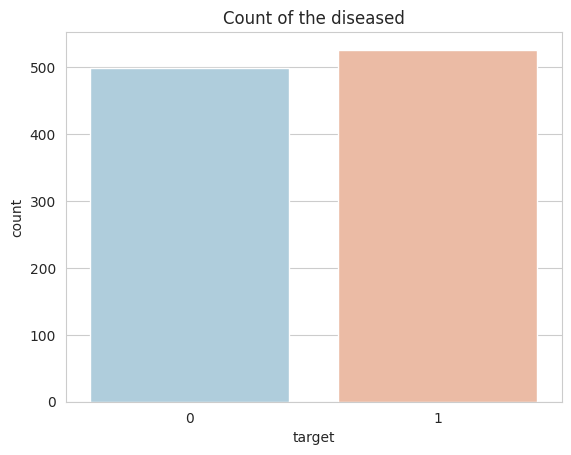

In [ ]:
sns.set_style('whitegrid')
sns.countplot(data=data, x= 'target', palette ='RdBu_r')
plt.title('Count of the diseased')

<ipython-input-21-b226cc376721>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x = 'sex', palette ='RdBu_r')


Text(0.5, 1.0, 'Gender Ratio')

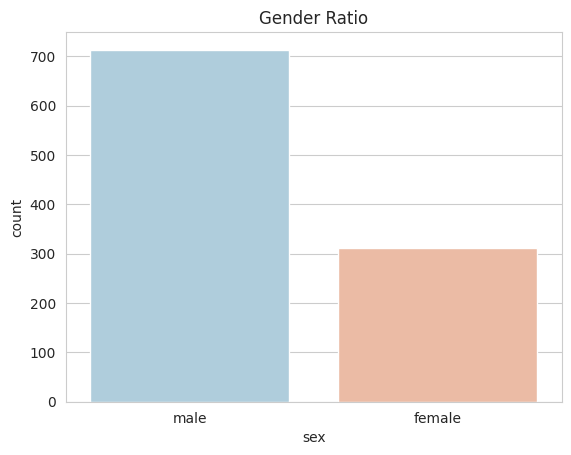

In [ ]:
sns.set_style('whitegrid')
sns.countplot(data=data, x = 'sex', palette ='RdBu_r')
plt.title('Gender Ratio')


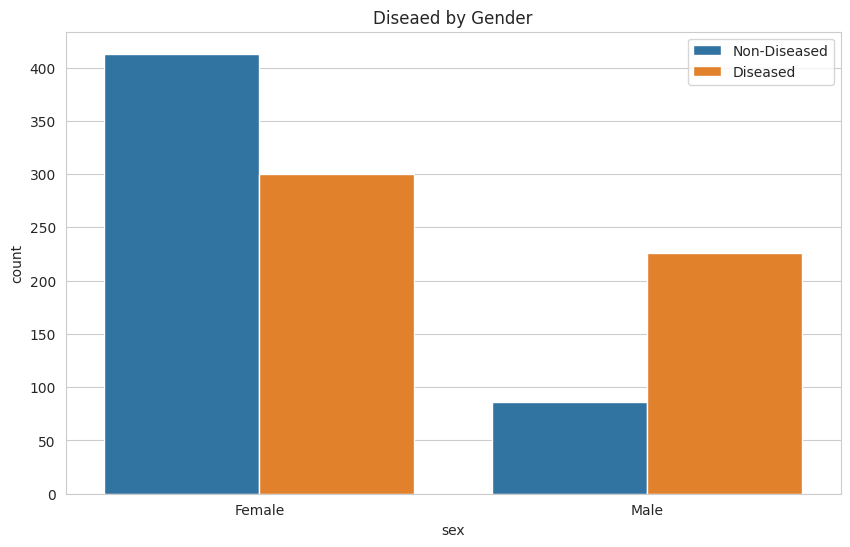

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='sex', hue='target')
plt.xticks([1,0],['Male','Female'])
plt.title('Diseaed by Gender')
plt.legend(labels=['Non-Diseased','Diseased'])
plt.show()

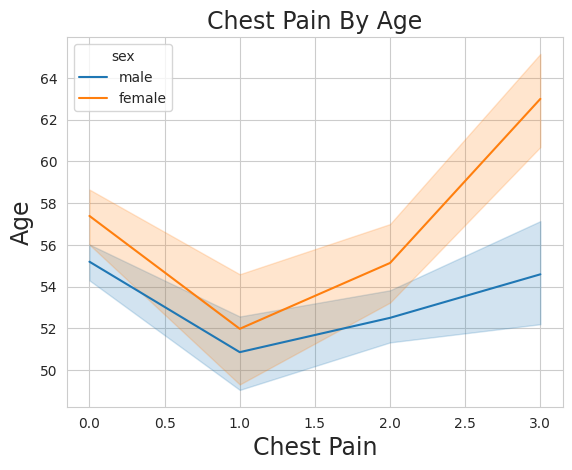

In [ ]:
sns.lineplot(data=data, x='cp', y ='age',hue='sex')
plt.xlabel('Chest Pain', fontsize=17)
plt.ylabel('Age', fontsize=17)

plt.title('Chest Pain By Age',fontsize=17)
plt.show()

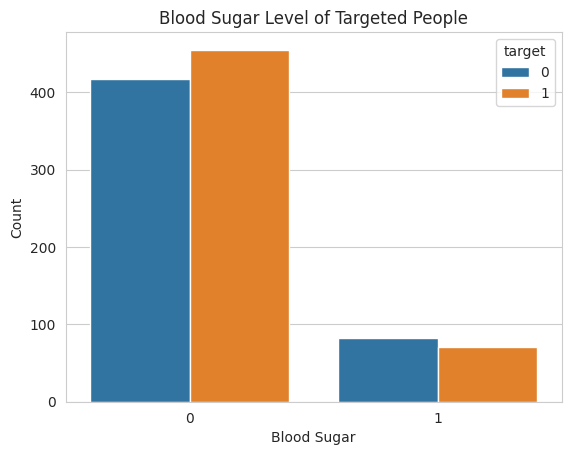

In [ ]:
sns.countplot(data=data, x='fbs', hue='target')
plt.xlabel('Blood Sugar')
plt.ylabel('Count')
plt.title('Blood Sugar Level of Targeted People')
plt.show()